In [1]:
import numpy as np
import DDM_util as util
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display
%matplotlib inline

In [2]:
num_individuals = 10
L = util.create_fullyconnected_graph(num_individuals)

## Test different beta

In [3]:
def test_leader_betas(beta1, beta2, save=False):
    x0 = np.zeros([num_individuals, 1])
    leader_indices = [1,2]
    sigma_val = 0
    sigma_val_filename = str(sigma_val).replace(".","")
    ylim = 25
    leader_betas = [beta1, beta2]
    beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
    sigma = np.ones([num_individuals, 1]) * sigma_val
    dt = 0.001
    T = 10
    plt.figure(0)
    if save:
        x = util.run_simulation(x0, beta, L, dt, sigma, T, title=r"$\beta_1={0}, \beta_2={1}, \sigma={2}$".format(beta1, beta2, sigma_val), savename="twoleader_noisy_{0}{1}_sigma{2}_connected".format(beta1, beta2, sigma_val_filename))
        plt.figure(1)
        discrepancies = util.plot_discrepancy(x, [1,2], L, T, ylim=ylim, title=r"$\beta_1={0}, \beta_2={1}, \sigma={2}$".format(beta1, beta2, sigma_val), savename="twoleader_noisy_{0}{1}_sigma{2}_discrepancy_connected".format(beta1, beta2, sigma_val_filename))
    else:
        x = util.run_simulation(x0, beta, L, dt, sigma, T, title=r"$\beta_1={0}, \beta_2={1}, \sigma={2}$".format(beta1, beta2, sigma_val))
        plt.figure(1)
        discrepancies = util.plot_discrepancy(x, [1,2], L, T, ylim=ylim, title=r"$\beta_1={0}, \beta_2={1}, \sigma={2}$".format(beta1, beta2, sigma_val))        
    return discrepancies

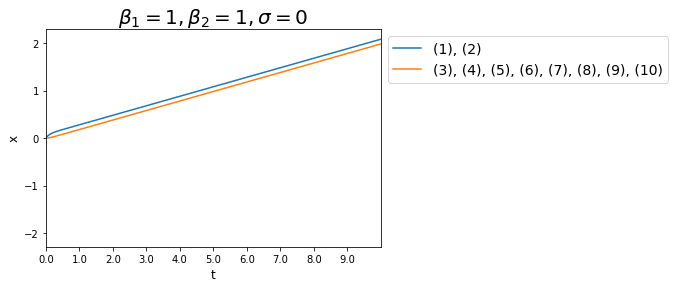

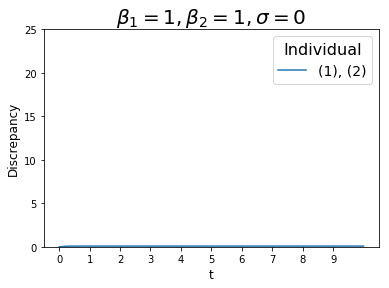

Total final discrepancy: 0.16
Final discrepancy: [ 0.08  0.08]


In [4]:
discrepancies_11 = test_leader_betas(1,1)

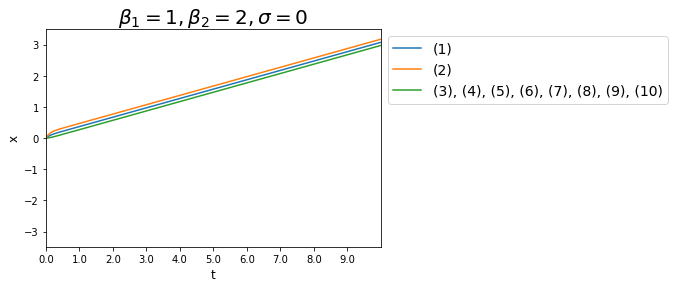

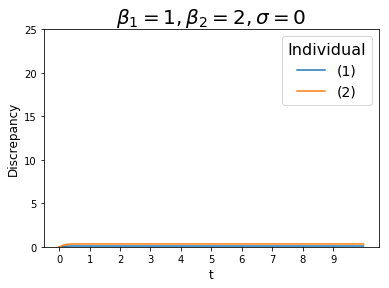

Total final discrepancy: 0.42
Final discrepancy: [ 0.09  0.33]


In [5]:
discrepancies_12 = test_leader_betas(1,2)

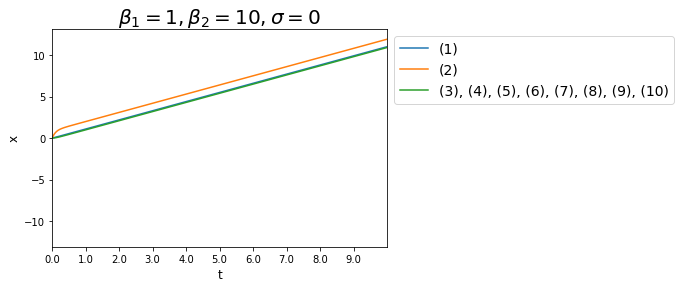

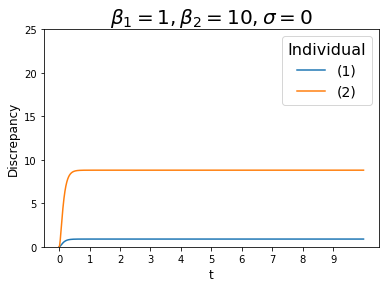

Total final discrepancy: 9.70
Final discrepancy: [ 0.89  8.81]


In [6]:
discrepancies_110 = test_leader_betas(1,10)

In [7]:
def print_average_discrepancies(discrepancies):
    print("1: %0.2f" % np.mean(discrepancies[0,:]))
    print("2: %0.2f" % np.mean(discrepancies[1,:]))

In [8]:
print_average_discrepancies(discrepancies_11)
print_average_discrepancies(discrepancies_12)
print_average_discrepancies(discrepancies_110)

1: 0.08
2: 0.08
1: 0.09
2: 0.33
1: 0.88
2: 8.68
